In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [8]:
from sklearn.compose import ColumnTransformer
                                # tipo      #coluna    #preserva as outras colunas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # Transformar em um matriz, a transformação vai primeira coluna

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [10]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,667,0,34,5,0.0,2,1,0,163830.64
1,0.0,1.0,0.0,427,1,42,1,75681.52,1,1,1,57098.0
2,1.0,0.0,0.0,535,0,29,2,112367.34,1,1,0,185630.76
3,0.0,0.0,1.0,654,1,40,5,105683.63,1,1,0,173617.09
4,0.0,0.0,1.0,850,0,57,8,126776.3,2,1,1,132298.49


In [11]:
sc = StandardScaler()
X_train[:,[3, 5, 6, 7, 8, 11]] = sc.fit_transform(X_train[:,[3, 5, 6, 7, 8, 11]])
X_test[:,[3, 5, 6, 7, 8, 11]] = sc.transform(X_test[:,[3, 5, 6, 7, 8, 11]])

In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,0.169582,0,-0.464608,0.006661,-1.215717,0.809503,1,0,1.106432
1,0.0,1.0,0.0,-2.304559,1,0.301026,-1.37744,-0.006312,-0.921591,1,1,-0.748664
2,1.0,0.0,0.0,-1.191196,0,-0.943129,-1.031415,0.579935,-0.921591,1,0,1.485335
3,0.0,0.0,1.0,0.035566,1,0.109617,0.006661,0.473128,-0.921591,1,0,1.276528
4,0.0,0.0,1.0,2.056114,0,1.736588,1.044737,0.810193,0.809503,1,1,0.558378


In [13]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,-0.552043,0,-0.368904,1.044737,0.879303,-0.921591,1,1,1.610857
1,1.0,0.0,0.0,-1.314903,0,0.109617,-1.031415,0.429722,-0.921591,1,0,0.49587
2,0.0,0.0,1.0,0.57163,0,0.301026,1.044737,0.308583,-0.921591,1,1,-0.424787
3,1.0,0.0,0.0,1.416961,1,-0.656016,-0.339364,0.575336,-0.921591,0,0,-0.187777
4,0.0,1.0,0.0,0.57163,1,-0.081791,0.006661,1.389611,0.809503,1,1,0.616842


In [14]:
# Criando um modelo sequencial
ann = tf.keras.models.Sequential()

In [15]:
# Adicionando a primeira camada oculta
# - 'units=6': 6 neurônios na camada
# - 'activation="relu"': Função de ativação ReLU para introduzir não-linearidade
# Esta camada terá como entrada o número de features (dimensão das variáveis independentes)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [16]:
# Adicionando a camada de saída
# - 'units=1': Um único neurônio porque o problema é de classificação binária
# - 'activation="sigmoid"': Retorna um valor entre 0 e 1 (probabilidade)
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
# Compilando o modelo com o otimizador 'adam', função de perda 'binary_crossentropy' e a métrica de 'accuracy'
ann.compile(
    optimizer = 'adam',  # O otimizador 'adam' é usado para ajustar os pesos do modelo de forma eficiente, considerando gradientes e momento.
    loss = 'binary_crossentropy',  # A função de perda 'binary_crossentropy' é adequada para problemas de classificação binária (dois rótulos: 0 ou 1).
    metrics = ['accuracy']  # 'accuracy' será monitorada durante o treinamento, calculando a proporção de previsões corretas.
)

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
# Treinando o modelo com os dados de treinamento (X_train e y_train) por 100 épocas e usando lotes de 32 amostras por vez
ann.fit(
    X_train,  # Dados de entrada (features) para o treinamento.
    y_train,  # Rótulos ou valores verdadeiros correspondentes às amostras de X_train.
    batch_size = 32,  # O modelo será treinado usando lotes de 32 amostras por vez.
    epochs = 100  # O modelo será treinado por 100 épocas (iterações completas sobre o conjunto de treinamento).
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.6621 - loss: 0.6117
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8015 - loss: 0.4369
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8049 - loss: 0.4252
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8200 - loss: 0.4040
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8252 - loss: 0.4006
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8472 - loss: 0.3689
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8447 - loss: 0.3719
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8500 - loss: 0.3601
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8482 - loss: 0.3630
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8497 - loss: 0.3589
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.8579 - loss: 0.3416
Epoch 12/100
250/25

In [20]:
bob = np.array([[600,'France', "Male", 40, 3, 60000, 2, 1, 1, 50000]])
bob[:, 2] = le.transform(bob[:, 2])
bob = ct.transform(bob)
bob[:, [0,3,4,5,6,9]] = sc.transform(bob[:, [0,3,4,5,6,9]])
bob = bob.astype(float)
print(ann.predict(bob)>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[ True]]


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


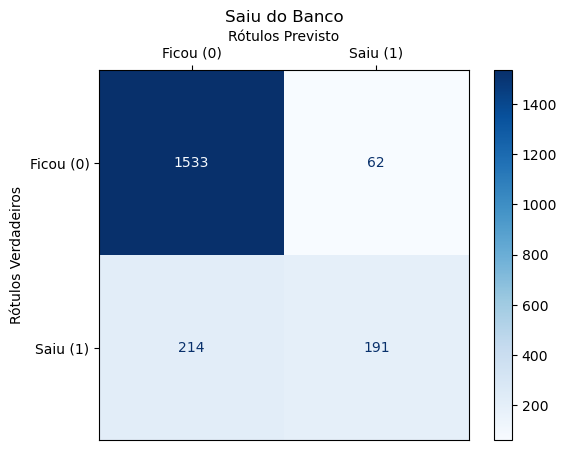

Acurácia: 86.20%


In [50]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Ficou (0)', 'Saiu (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Saiu do Banco")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")